![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


## ANALISIS EXPLORATORIO

In [6]:
#dimension
print("El archivo tiene la siguiente dimension: ",dataTraining.shape)


El archivo tiene la siguiente dimension:  (400000, 6)


In [7]:
#Tipos de variables y revisión de datos nulos
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [8]:
#Validando que el df no tenga duplicados
duplicados = dataTraining.duplicated().sum()
print("Número total de duplicados:", duplicados)

# Eliminando duplicados
df_train2 = dataTraining.drop_duplicates()
print("Tamaño de DataFrame con duplicados: {} y Tamaño de DataFrame sin duplicados: {}".format(dataTraining.shape[0], df_train2.shape[0]))

Número total de duplicados: 169
Tamaño de DataFrame con duplicados: 400000 y Tamaño de DataFrame sin duplicados: 399831


In [9]:
#validando que los campos no tengan nulos
# Contar los valores nulos en cada columna
valores_nulos_por_columna = df_train2.isnull().sum()
# Filtrar las columnas que tienen valores nulos
columnas_con_nulos = valores_nulos_por_columna[valores_nulos_por_columna > 0]

# Imprimir los resultados
print("Valores nulos por columna:")
print(columnas_con_nulos)

Valores nulos por columna:
Series([], dtype: int64)


Resumen estadístico de las variables numéricas
               Price           Year       Mileage
count  399831.000000  399831.000000  3.998310e+05
mean    21143.998537    2013.196591  5.509327e+04
std     10751.954687       3.292060  4.087644e+04
min      5001.000000    1997.000000  5.000000e+00
25%     13499.000000    2012.000000  2.586450e+04
50%     18449.000000    2014.000000  4.297000e+04
75%     26999.000000    2016.000000  7.745400e+04
max     79999.000000    2018.000000  2.457832e+06


<Figure size 1080x864 with 0 Axes>

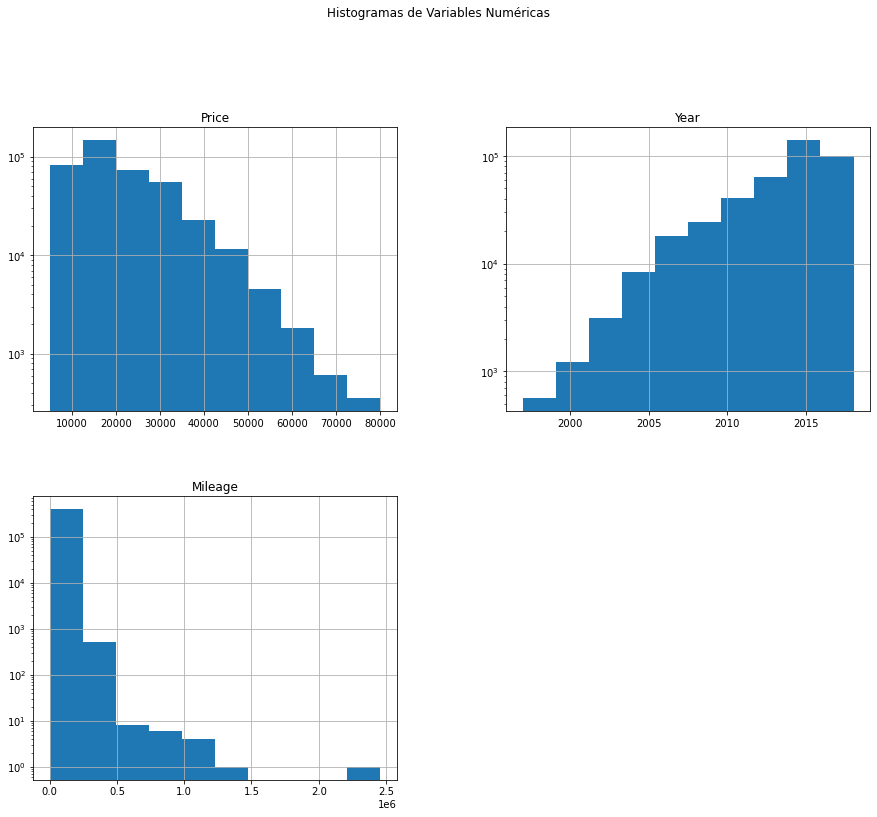

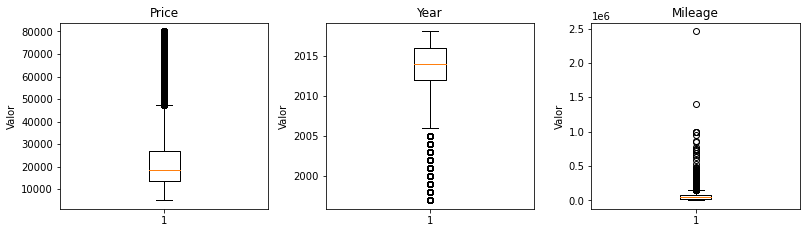

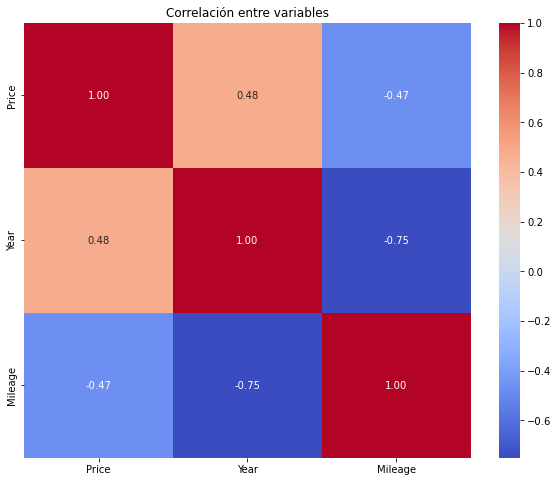

In [10]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico de las variables numéricas")
print(df_train2.describe())

#Distribucciones de las variables numericas
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df_train2.select_dtypes(include=['int', 'float'])
# Histogramas de las variables numéricas
plt.figure(figsize=(15, 12))
df_numeric.hist(figsize=(15, 12), log=True)
plt.suptitle("Histogramas de Variables Numéricas", y=1.02)
plt.show()

#Analizando valores atipicos
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4, 4, i+1) 
    plt.boxplot(df_numeric[col])
    plt.title(col)
    plt.ylabel("Valor")
plt.tight_layout()
plt.show()

# Correlación general y mapa de calor
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

Valor unicos de las variables categoricas
Columna: State
 TX    45914
 CA    36512
 FL    33713
 GA    18180
 NC    17928
 IL    16788
 VA    15893
 PA    13035
 NY    12446
 NJ    12130
 OH    11364
 WA    10898
 CO    10870
 AZ    10747
 TN     9273
 MA     8586
 MD     8243
 MO     8029
 IN     7850
 KY     6688
 AL     6282
 WI     5612
 MN     5415
 MI     5326
 OK     5096
 CT     4942
 OR     4907
 SC     4814
 UT     4795
 LA     3847
 KS     3704
 NV     3332
 AR     3125
 MS     3043
 NH     2744
 NE     2522
 IA     2325
 NM     2280
 ID     1736
 DE     1221
 HI     1180
 MT      997
 ME      965
 RI      833
 AK      813
 ND      681
 WV      666
 SD      621
 VT      579
 WY      335
 DC        6
Name: State, dtype: int64


Columna: Make
Ford             62837
Chevrolet        58354
Toyota           45903
Honda            33188
Jeep             24366
GMC              20834
Kia              16341
Dodge            16158
Hyundai          15054
Lexus            13663
BMW     

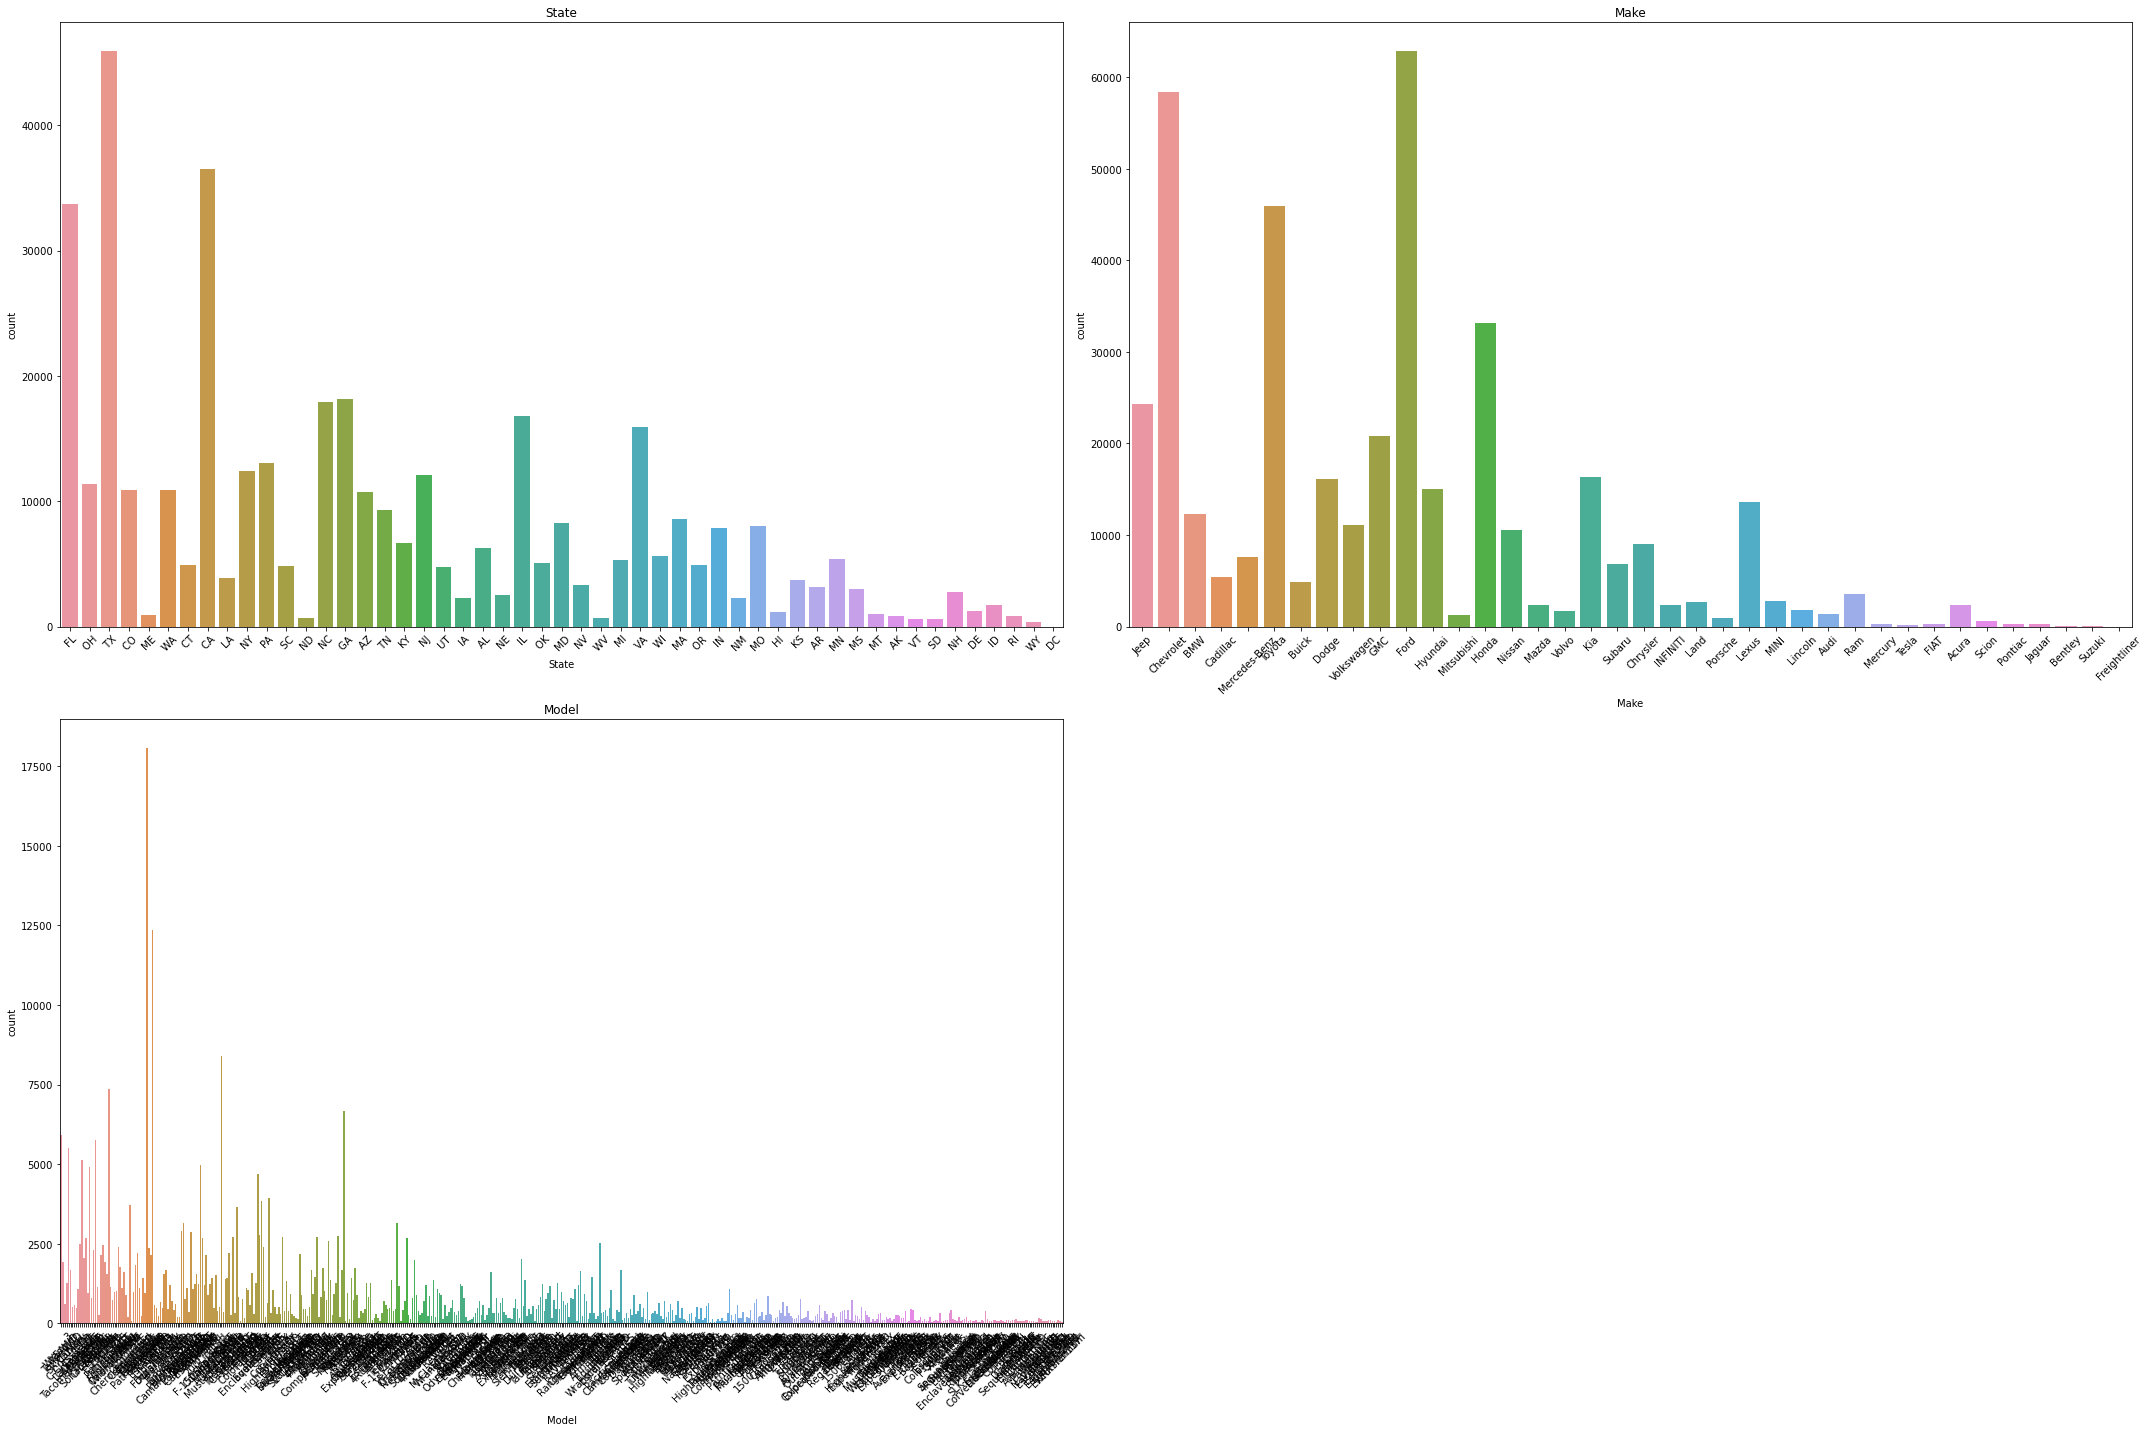

Analisis de correlacion con la variable objeivo price
Relación entre State y la variable objetivo:
State
 AK    21988.726937
 AL    22429.400191
 AR    23750.631360
 AZ    20039.249000
 CA    20526.674408
 CO    21158.158970
 CT    18802.669365
 DC    11872.000000
 DE    21022.352170
 FL    20069.581259
 GA    21073.261166
 HI    17288.082203
 IA    22190.412043
 ID    21879.111751
 IL    20614.453955
 IN    20099.591720
 KS    20964.339093
 KY    20914.152362
 LA    23477.059787
 MA    21391.870603
 MD    20372.163533
 ME    22471.632124
 MI    19750.847728
 MN    21323.823084
 MO    21312.057791
 MS    24357.383174
 MT    25385.744233
 NC    21310.861557
 ND    21483.114537
 NE    22813.591197
 NH    21189.571429
 NJ    20738.000907
 NM    23647.096930
 NV    20494.521309
 NY    21512.411538
 OH    19178.735832
 OK    22249.835557
 OR    21727.162421
 PA    21024.878634
 RI    22026.865546
 SC    21039.551516
 SD    25078.223833
 TN    21121.394910
 TX    23270.200919
 UT    22270.64

In [11]:
#Valor unicos de las variables categoricas
print('Valor unicos de las variables categoricas')
for col in df_train2.select_dtypes(include=['object']).columns:
    print(f"Columna: {col}")
    print(df_train2[col].value_counts())
    print("\n")

#distribuiccion de las variables categoricas
print('Distribuiccion de las variables categoricas')
plt.figure(figsize=(30, 20))
for i, col in enumerate(df_train2.select_dtypes(include=['object']).columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df_train2)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Analisis de correlacion con la variable objeivo price
print('Analisis de correlacion con la variable objeivo price')
for col in df_train2.select_dtypes(include=['object']).columns:
    print(f"Relación entre {col} y la variable objetivo:")
    print(df_train2.groupby(col)['Price'].mean())
    print("\n")

BOXPLOT DE Price
count    399831.000000
mean      21143.998537
std       10751.954687
min        5001.000000
25%       13499.000000
50%       18449.000000
75%       26999.000000
max       79999.000000
Name: Price, dtype: float64


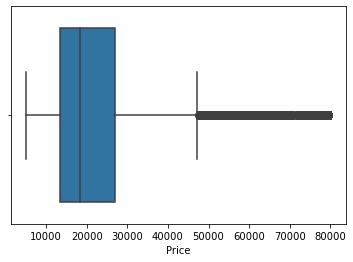

In [12]:
#Datos atipicos en vble Price
print('BOXPLOT DE Price')
sns.boxplot(x='Price', data=df_train2)

descripcion_variable_objetivo = df_train2['Price'].describe()
print(descripcion_variable_objetivo)

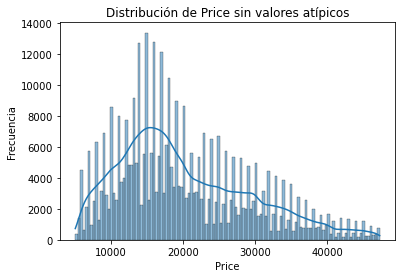

In [13]:
Q1 = df_train2['Price'].quantile(0.25)
Q3 = df_train2['Price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df_train2[(df_train2['Price'] < limite_inferior) | (df_train2['Price'] > limite_superior)]
df_train3 = df_train2[(df_train2['Price'] >= limite_inferior) & (df_train2['Price'] <= limite_superior)]
sns.histplot(df_train3['Price'], kde=True)
plt.title('Distribución de Price sin valores atípicos')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


## PREPROCESAMIENTO
(10 puntos)
Los datos de entrenamiento se dividen en datos de entrenamiento y validación. Si decidieron preprocesar los datos (estandarizar, normalizar, imputar valores, etc), estos son correctamente preprocesados al ajustar sobre los datos de entrenamiento (.fit_transform()) y al transformar los datos del set de validación (.transform()). (10 puntos)

In [14]:
# Verificar la cantidad de valores nulos en cada columna
print(df_train3.isnull().sum())

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64


In [15]:
#estandarizacion vbles:Este procedimiento consiste en transformar linealmente las variables predictoras para que tengan media cero y varianza y desviación estándar igual a uno.
#no creo que sea correcto estandarizar, porque los valores de las variables numericos son muy altos

In [16]:
#Separando variables
X = df_train3.drop('Price', axis=1)
y = df_train3['Price']

In [17]:
#codificando variables categoricas
from sklearn.preprocessing import LabelEncoder

X_encoded = pd.get_dummies(X) #se aumenta la dimension de la base
print("dimension dummificando la svarables categoricas: ",X_encoded.shape)
label_encoder = LabelEncoder() #creando el label encoding, aca no se aumemta dimension en la base 

# Aplicar label encoding a la variable categórica, porque con la dimmificacion se aumenta demasiado la base y no es eficiente 
X['State'] = label_encoder.fit_transform(X['State'])
X['Make'] = label_encoder.fit_transform(X['Make'])
X['Model'] = label_encoder.fit_transform(X['Model'])

dimension dummificando la svarables categoricas:  (388973, 615)


In [18]:
#Division de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODELACIÓN
mejor rmse del año pasado 3392.75963

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("RMSE:", rmse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print("Coeficiente de Determinación (R^2) en el conjunto de prueba:", r2_rf)


RMSE: 3154.3767548368046
Coeficiente de Determinación (R^2) en el conjunto de prueba: 0.8835681681222509


In [20]:
from xgboost import XGBRegressor

modelo_xgboost = XGBRegressor()
modelo_xgboost.fit(X_train, y_train)

y_modelo_xgboost = modelo_xgboost.predict(X_test)

rmse_xgboost = mean_squared_error(y_test, y_modelo_xgboost, squared=False)
print("RMSE_XGboost:", rmse_xgboost)

r2_xgboost = r2_score(y_test, y_modelo_xgboost)
print("Coeficiente de Determinación (R^2) en el conjunto de prueba:", r2_xgboost)


RMSE_XGboost: 3227.436285484246
Coeficiente de Determinación (R^2) en el conjunto de prueba: 0.8781122787197506


## CALIBRACIÓN DEL MODELO
(15 puntos)

* Se calibran los parámetros que se consideren pertinentes del modelo de clasificación seleccionado. (5 puntos)
* Se justifica el método seleccionado de calibración. (5 puntos)
* Se analizan los valores calibrados de cada parámetro y se explica cómo afectan el modelo. (5 puntos)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0]}

rf_model = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados para Random Forest:")
print(grid_search_rf.best_params_)

y_pred_calibrado_rf = grid_search_rf.predict(X_test)

rmse_calibrado_rf = mean_squared_error(y_test, y_pred_calibrado_rf, squared=False)
print("RMSE del modelo calibrado de Random Forest:", rmse_calibrado_rf)

r2_calibrado_rf = r2_score(y_test, y_pred_calibrado_rf)
print("Coeficiente de Determinación (R^2) en el conjunto de prueba del modelo calibrado de Random Forest:", r2_calibrado_rf)



In [ ]:
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

modelo_xgboost = XGBRegressor()

grid_search_xgboost = GridSearchCV(estimator=modelo_xgboost, param_grid=param_grid_xgboost, cv=3, scoring='neg_mean_squared_error')
grid_search_xgboost.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgboost.best_params_)

y_pred_calibrado_xgboost = grid_search_xgboost.predict(X_test)

rmse_calibrado_xgboost = mean_squared_error(y_test, y_pred_calibrado_xgboost, squared=False)
print("RMSE del modelo calibrado de XGBoost:", rmse_calibrado_xgboost)

r2_calibrado_xgboost = r2_score(y_test, y_pred_calibrado_xgboost)
print("Coeficiente de Determinación (R^2) en el conjunto de prueba del modelo calibrado de XGBoost:", r2_calibrado_xgboost)


## ENTRENAMIENTO DEL MODELO
(15 puntos)

* Se entrena el modelo de clasificación escogido con los datos del set de entrenamiento preprocesados y los parámetros óptimos. (5 puntos)
* Se presenta el desempeño del modelo en los datos de validación con al menos una métrica de desempeño. (5 puntos)
* Se justifica la selección del modelo correctamente. (5 puntos)

## DISPONIBILIZACIÓN DEL MODELO
(30 puntos)

* Se disponibiliza el modelo en una API alojada en un servicio en la nube. (20 puntos)
* Se hacen las predicciones sobre el valor del automóvil en al menos dos observaciones del set de validación. (10 puntos)

## CONCLUSIONES
(10 puntos)

Se presentan conclusiones claras y concisas sobre el desarrollo y los resultados del proyecto. (10 puntos)

In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()